<a href="https://colab.research.google.com/github/shivanigaikawad0101/5GNetwrokslicing/blob/main/KNNfor5GAdvanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


df= pd.read_excel("/content/5G Datset (1).xlsx")


In [ ]:
df['Slice Type'] = df['Slice Type'].replace({'embb': 'eMBB', 'URLLC': 'URRLC'})

In [ ]:
lb = LabelEncoder()
for cat in categoric:
    df[cat] = lb.fit_transform(df[cat])
df

,User Device Type,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type,Slice Type
0,8,600,0.010000,50,30,17500,1082,43000000,0,1
1,8,100,0.010000,7,38,1700,2647,45000000,0,1
2,8,240,0.000010,46,38,900,2821,65000000,0,1
3,8,120,0.000100,12,50,900,864,77000000,0,1
4,8,60,0.000001,49,60,1700,1945,33000000,0,1
...,...,...,...,...,...,...,...,...,...,...
2995,1,180,0.010000,40,38,1700,1476,77000000,1,2
2996,1,100,0.000010,28,29,300,512,10000000,1,2
2997,1,180,0.000001,25,29,300,1752,65000000,1,2
2998,1,300,0.001000,20,45,300,453,45000000,1,2


In [ ]:
x=df.drop(['Slice Type'],axis=1)
y=df['Slice Type']

In [ ]:
scaler = MinMaxScaler()
X_data_minmax = scaler.fit_transform(x.drop(['User Device Type', 'Modulation Type'], axis=1))
X_data_minmax

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 3.49610037e-01, 5.10791367e-01],
       [7.40740741e-02, 1.00000000e+00, 1.22448980e-01, ...,
        8.13953488e-02, 8.80298406e-01, 5.39568345e-01],
       [3.33333333e-01, 9.00090009e-04, 9.18367347e-01, ...,
        3.48837209e-02, 9.39301458e-01, 8.27338129e-01],
       ...,
       [2.22222222e-01, 0.00000000e+00, 4.89795918e-01, ...,
        0.00000000e+00, 5.76805697e-01, 8.27338129e-01],
       [4.44444444e-01, 9.99099910e-02, 3.87755102e-01, ...,
        0.00000000e+00, 1.36317396e-01, 5.39568345e-01],
       [1.00000000e+00, 9.00090009e-04, 7.95918367e-01, ...,
        3.48837209e-02, 5.90369617e-01, 5.10791367e-01]])

In [ ]:
x = pd.concat([pd.DataFrame(X_data_minmax), x[['User Device Type','Modulation Type']]], axis=1, ignore_index=True)

In [ ]:
x.rename(columns={0:'Duration(sec)',1:'Paket Loss Rate(Reliability)',2:'Packet Delay Budget(Latency(ms))',3:'Bandwidth(GHz)'})

,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget(Latency(ms)),Bandwidth(GHz),4,5,6,7,8
0,1.000000,1.000000,1.000000,0.032258,1.000000,0.349610,0.510791,8,0
1,0.074074,1.000000,0.122449,0.290323,0.081395,0.880298,0.539568,8,0
2,0.333333,0.000900,0.918367,0.290323,0.034884,0.939301,0.827338,8,0
3,0.111111,0.009901,0.224490,0.677419,0.034884,0.275687,1.000000,8,0
4,0.000000,0.000000,0.979592,1.000000,0.081395,0.642252,0.366906,8,0
...,...,...,...,...,...,...,...,...,...
2995,0.222222,1.000000,0.795918,0.290323,0.081395,0.483215,1.000000,1,1
2996,0.074074,0.000900,0.551020,0.000000,0.000000,0.156324,0.035971,1,1
2997,0.222222,0.000000,0.489796,0.000000,0.000000,0.576806,0.827338,1,1
2998,0.444444,0.099910,0.387755,0.516129,0.000000,0.136317,0.539568,1,1


In [ ]:
df.head()

,User Device Type,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type,Slice Type
0,8,600,0.010000,50,30,17500,1082,43000000,0,1
1,8,100,0.010000,7,38,1700,2647,45000000,0,1
2,8,240,0.000010,46,38,900,2821,65000000,0,1
3,8,120,0.000100,12,50,900,864,77000000,0,1
4,8,60,0.000001,49,60,1700,1945,33000000,0,1


In [ ]:
df.shape

(3000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   User Device Type                   3000 non-null   int64  
 1   Duration(sec)                      3000 non-null   int64  
 2   Paket Loss Rate(Reliability)       3000 non-null   float64
 3   Packet Delay Budget( Latency(ms))  3000 non-null   int64  
 4   Bandwidth(GHz)                     3000 non-null   int64  
 5   Delay Rate(Mbps)                   3000 non-null   int64  
 6   Speed(Mbps)                        3000 non-null   int64  
 7   Jitter(ps)                         3000 non-null   int64  
 8   Modulation Type                    3000 non-null   int64  
 9   Slice Type                         3000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 234.5 KB


In [ ]:
df.describe()

,User Device Type,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type,Slice Type
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,4.731667,241.673333,0.004496,29.855333,41.584333,4691.866667,1533.408333,3.883700e+07,2.246000,0.923667
std,2.387097,179.922550,0.004917,13.656399,9.332412,5569.961281,846.788300,2.213678e+07,1.856511,0.885495
min,0.000000,60.000000,0.000001,1.000000,29.000000,300.000000,51.000000,7.500000e+06,0.000000,0.000000
25%,3.000000,100.000000,0.000010,20.000000,36.000000,900.000000,800.750000,1.900000e+07,0.000000,0.000000
50%,5.000000,210.000000,0.000100,28.000000,40.000000,1350.000000,1550.500000,3.700000e+07,2.000000,1.000000
75%,7.000000,300.000000,0.010000,40.000000,50.000000,10125.000000,2250.250000,4.500000e+07,4.000000,2.000000
max,9.000000,600.000000,0.010000,50.000000,60.000000,17500.000000,3000.000000,7.700000e+07,5.000000,2.000000


In [ ]:
df.isnull().sum()

User Device Type                     0
Duration(sec)                        0
Paket Loss Rate(Reliability)         0
Packet Delay Budget( Latency(ms))    0
Bandwidth(GHz)                       0
Delay Rate(Mbps)                     0
Speed(Mbps)                          0
Jitter(ps)                           0
Modulation Type                      0
Slice Type                           0
dtype: int64

In [ ]:
# Get unique values in the 'Slice Typw' column
unique_values = df['Slice Type'].unique()

# Display the result
print("Slice Type:", unique_values)


Slice Type: [1 0 2]


<Axes: xlabel='Slice Type', ylabel='count'>

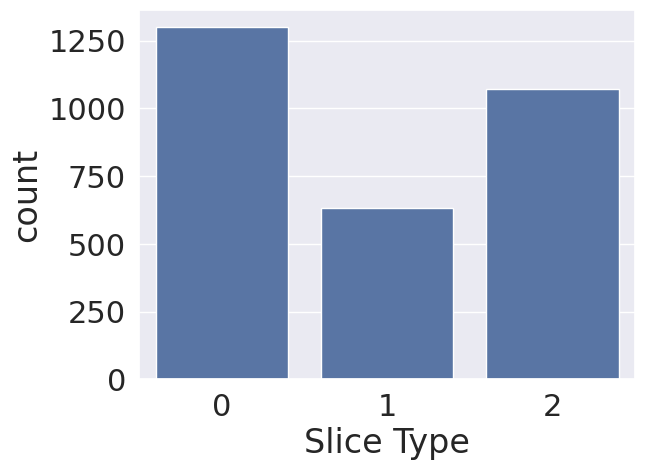

In [ ]:
sns.countplot(x="Slice Type", data = df)

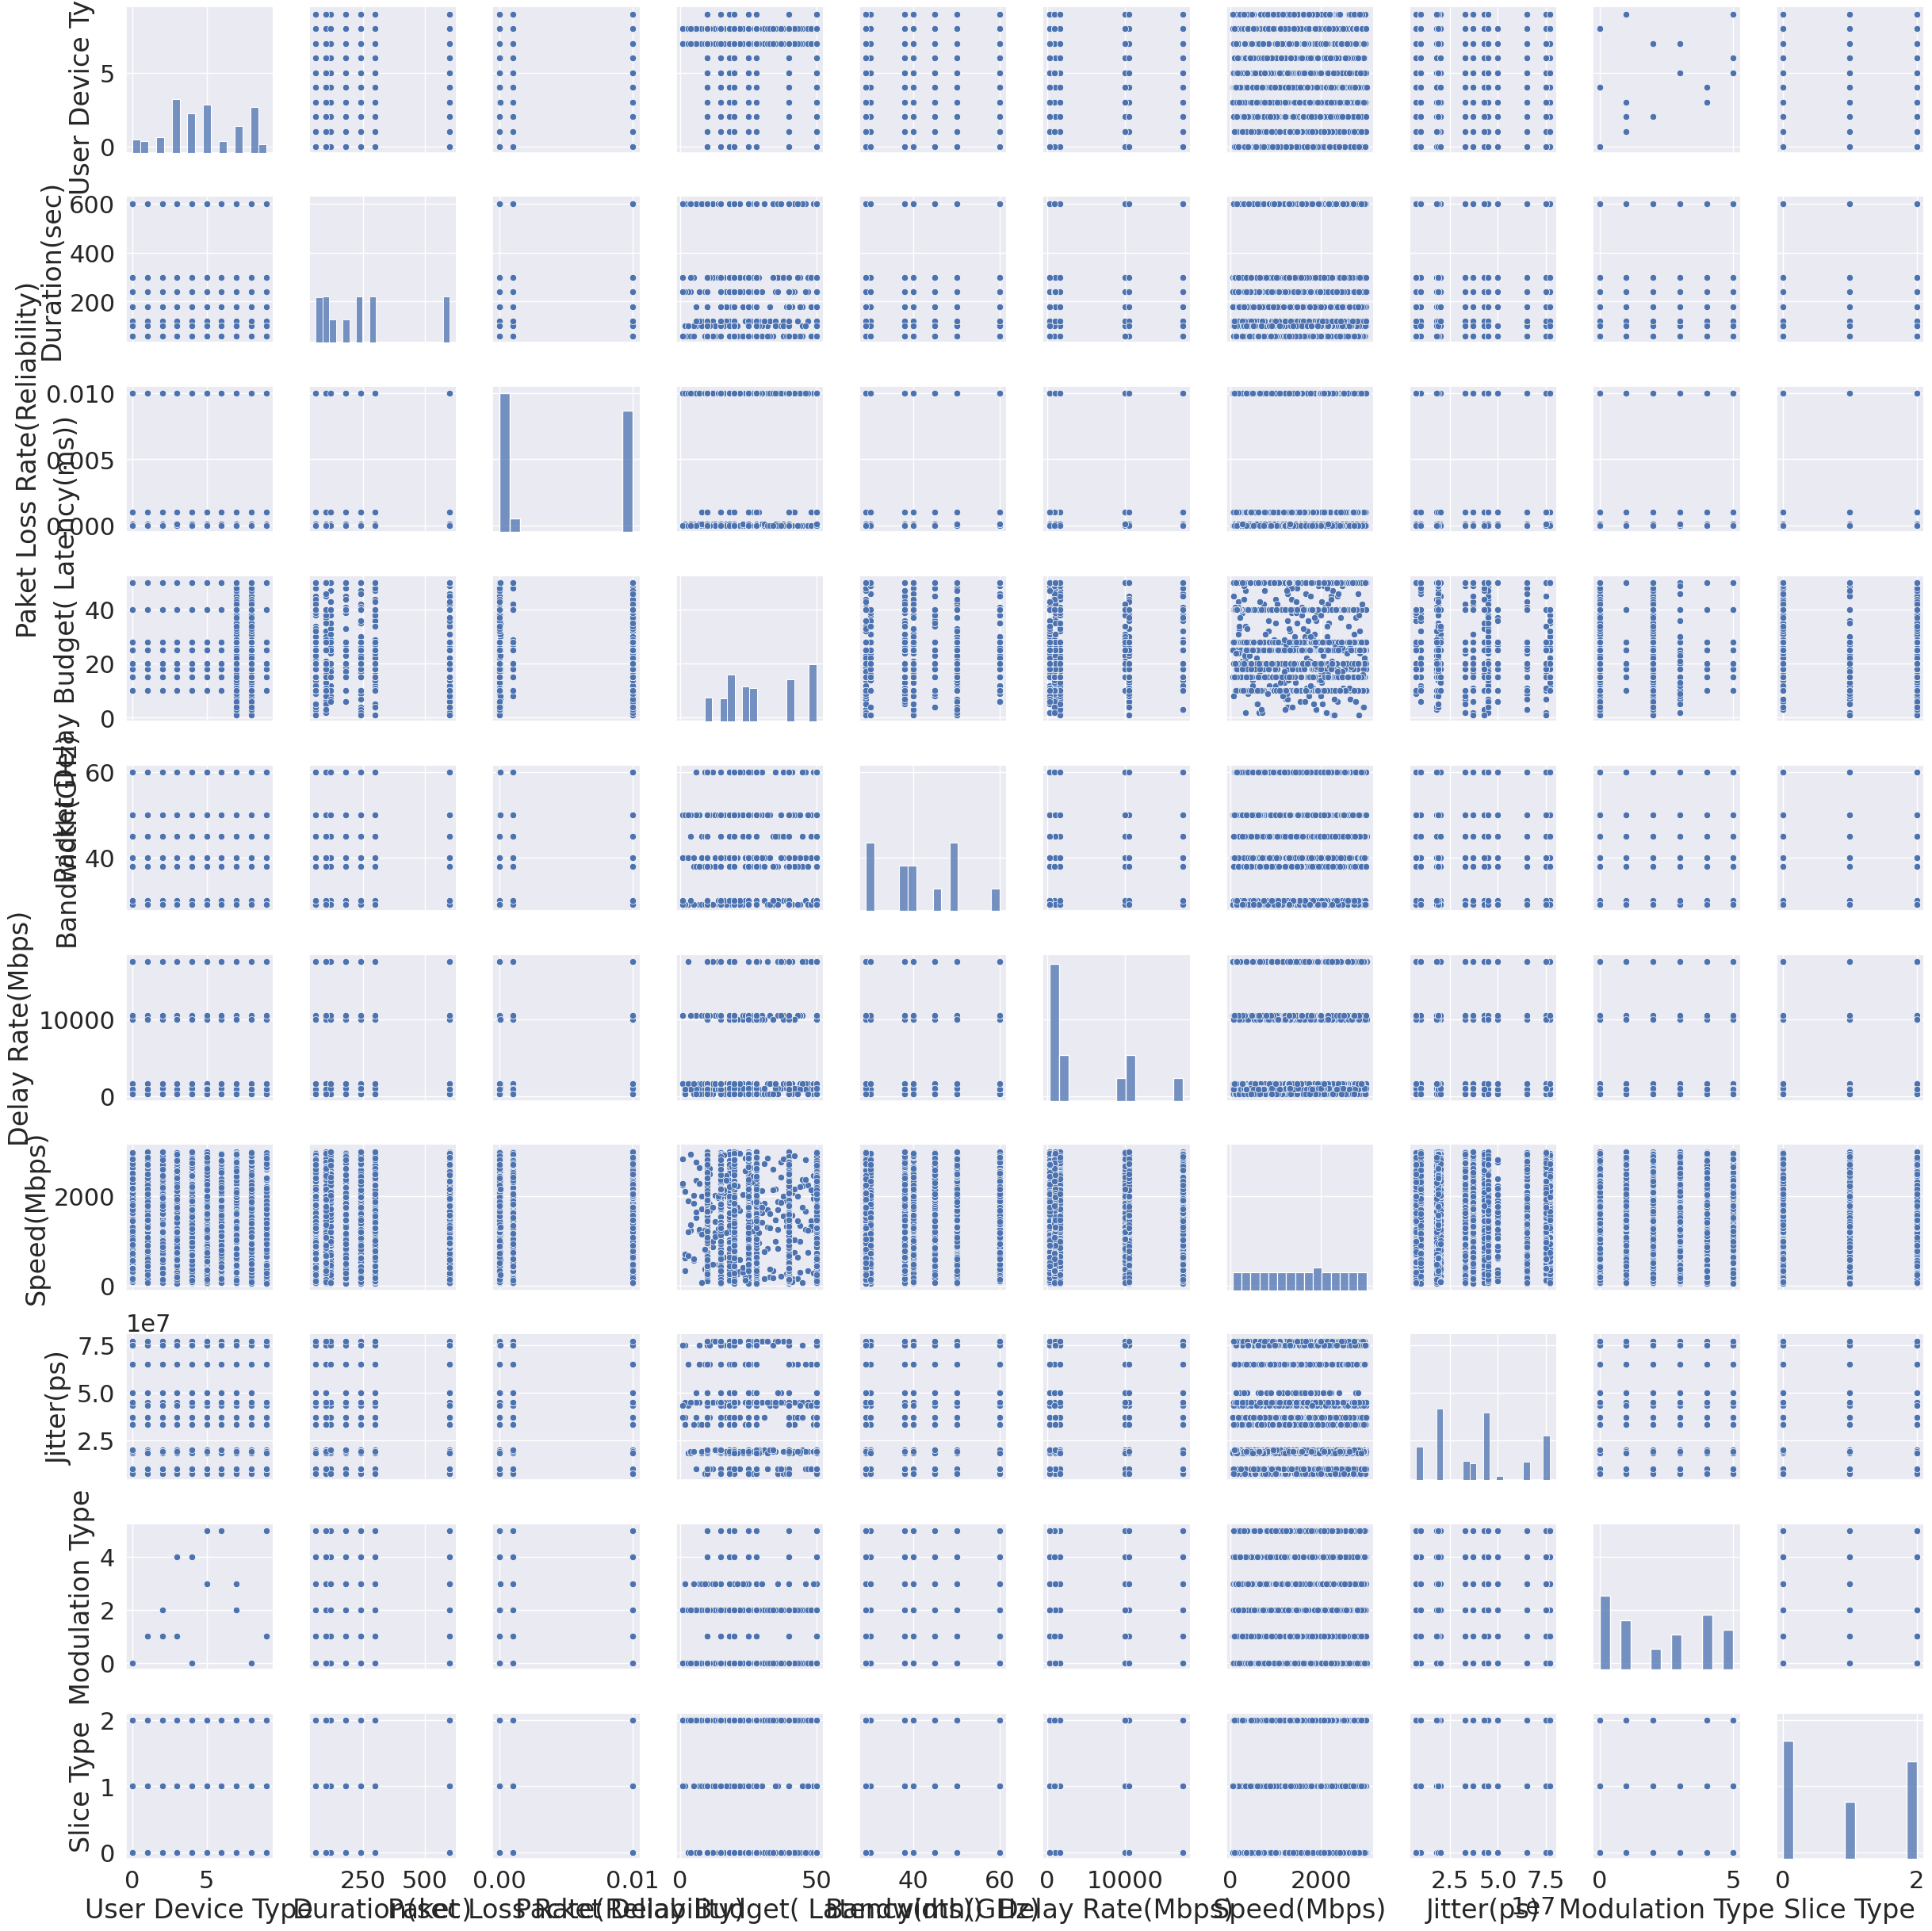

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create a pair plot
sns.pairplot(df)
plt.show()


In [ ]:
x=df.drop(['Slice Type'],axis=1)
y=df['Slice Type']

In [ ]:
x.head()

,User Device Type,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type
0,8,600,0.010000,50,30,17500,1082,43000000,0
1,8,100,0.010000,7,38,1700,2647,45000000,0
2,8,240,0.000010,46,38,900,2821,65000000,0
3,8,120,0.000100,12,50,900,864,77000000,0
4,8,60,0.000001,49,60,1700,1945,33000000,0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Slice Type, dtype: int64

<Axes: >

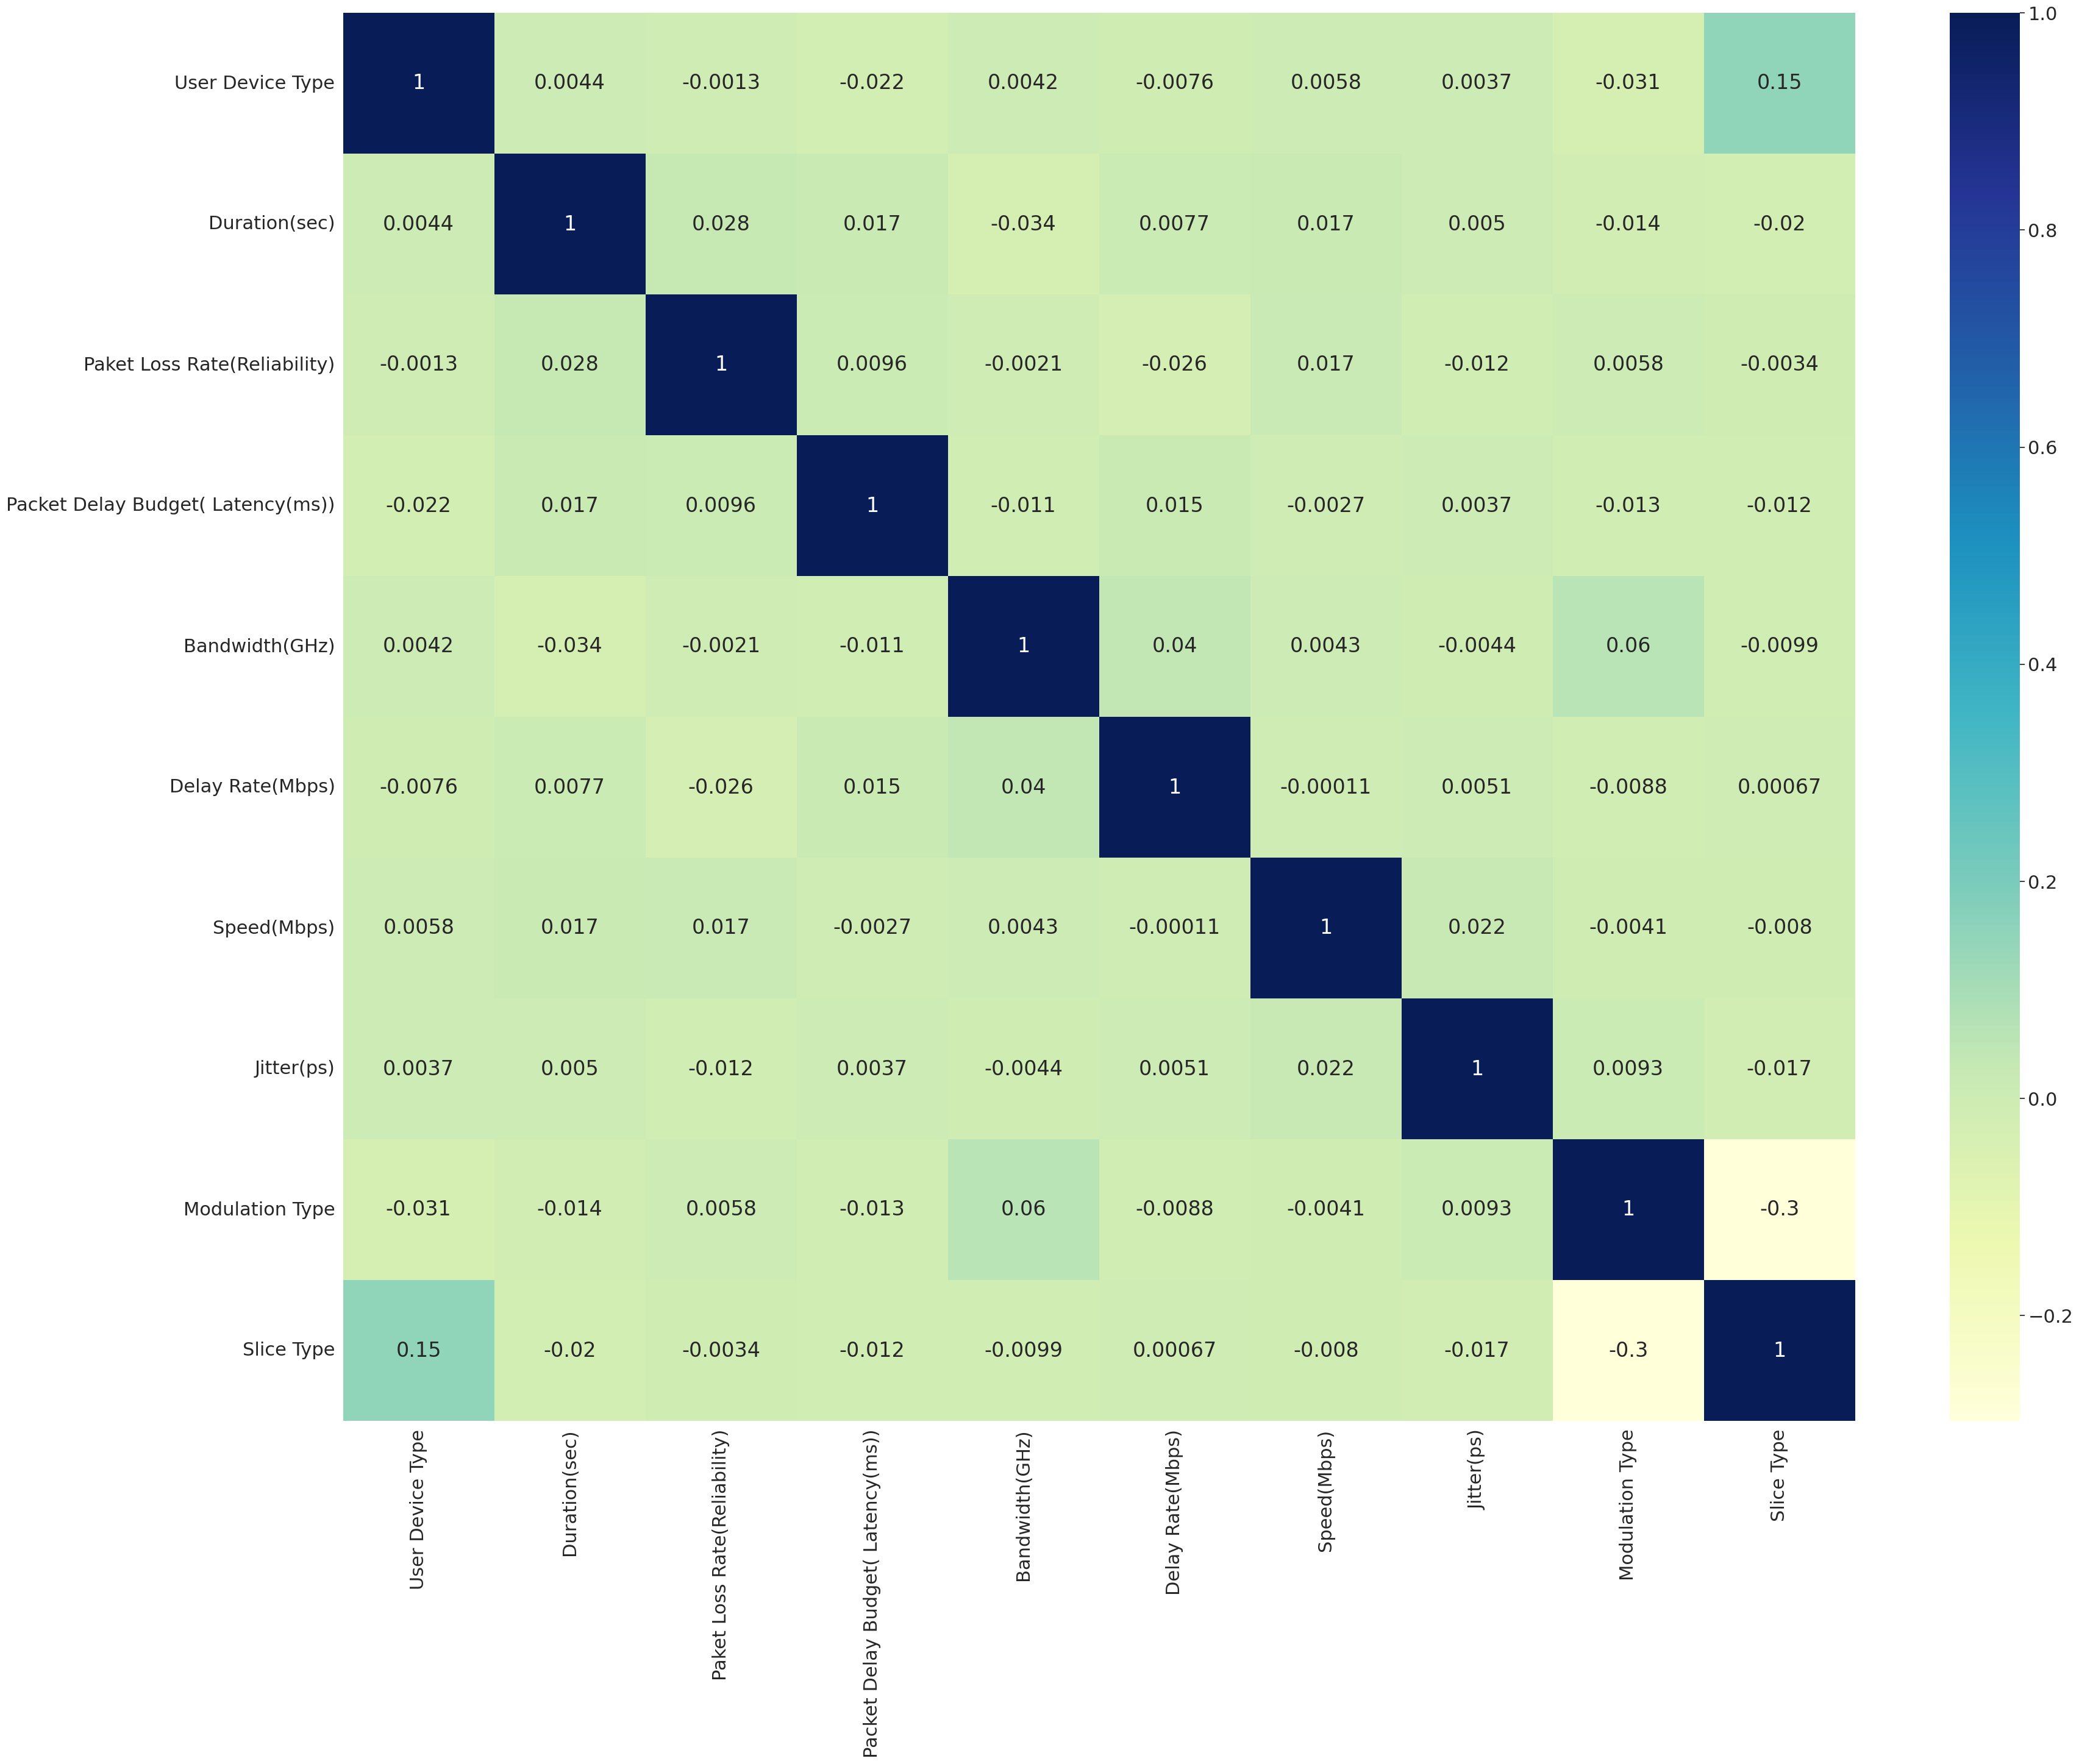

In [ ]:

plt.figure(figsize = (40, 30))
sns.set(font_scale=2)
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

**Applying KNN Algorithm**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'df' with features and target variable
# X = df[features]
# y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': np.arange(1,21),  # Range of k values
    'weights': ['uniform', 'distance'],  # Weighting of neighbors
    'metric' : ['minkowski','euclidean','manhattan']
}


# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Use the best hyperparameters to train the final KNN model
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best hyperparameters: {accuracy}")


Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 22, 'weights': 'distance'}
Accuracy with best hyperparameters: 0.61


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'df' with features and target variable
# X = df[features]
# y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Use the best hyperparameters to train the final Random Forest model
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best hyperparameters: {accuracy}")


Best hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy with best hyperparameters: 0.69


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'df' with features and target variable
# X = df[features]
# y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the parameter grid for hyperparameter tuning (hypothetical)
param_grid = {
    'var_smoothing': [1e-10, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]  # Experiment with different values
}


# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(nb_classifier, param_grid, cv=7, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Use the best hyperparameters to train the final Gaussian Naive Bayes model
best_nb = GaussianNB(**best_params)
best_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_nb.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best hyperparameters: {accuracy}")


Best hyperparameters: {'var_smoothing': 1e-10}
Accuracy with best hyperparameters: 0.415


In [ ]:
x=df.drop(['Slice Type'],axis=1)
y=df['Slice Type']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'df' with features and target variable
# X = df[features]
# y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Use the best hyperparameters to train the final XGBoost model
best_xgb = XGBClassifier(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best hyperparameters: {accuracy}")


Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Accuracy with best hyperparameters: 0.6983333333333334
